99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
9

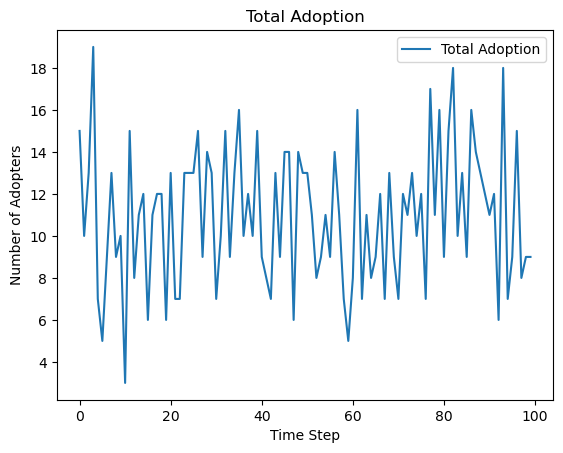

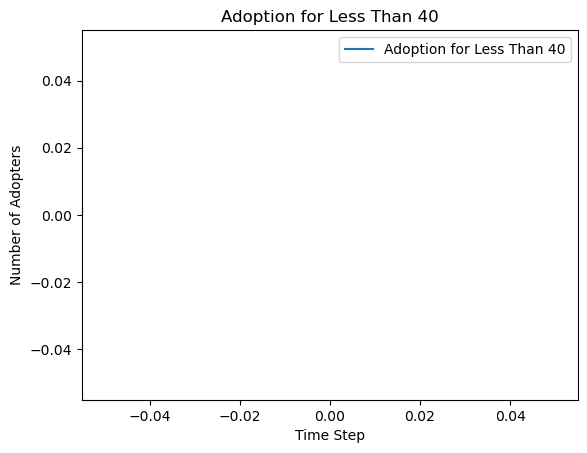

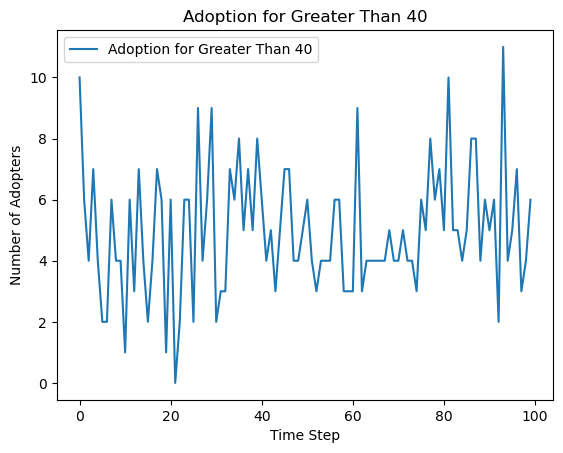

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

strengh_pub = 0.5

class Person:
    def __init__(self, age):
        self.age = age
        self.prob_adoption = strengh_pub
        self.prob_decline = 0
        self.innovation_status = 0

def influence_people_notadopted(person, population):
    for other in population :
        gap_age = abs(person.age - other.age)
        if other.innovation_status == 1:
            person.prob_adoption = person.prob_adoption + (1 + (1/1+gap_age)/100)
        if other.innovation_status == 0:
            person.prob_adoption = person.prob_adoption - (1 + (1/1+gap_age)/100)



def decide_adoption(person, neighbors_innov_status, probability_of_adoption):
    if person.innovation_status == 0:
        adoption_probability = probability_of_adoption
        if person.age < 40:
            adoption_probability *= person.pub_sensitivity
        if any(neighbors_innov_status):
            adoption_probability *= 1.2  # Increase adoption probability if neighbors have adopted
        return np.random.choice([0, 1], p=[1 - adoption_probability, adoption_probability])
    else:
        return 0

def generate_population(population_size, initial_innovators):
    population = []
    for _ in range(population_size):
        age = random.randint(15, 75)
        pub_sensitivity = max(random.gauss(1, 0.2), 0)  # Sensitivity to pub around innovation
        if initial_innovators > 0:
            innovation_status = 1
            initial_innovators -= 1
        else:
            innovation_status = 0
        population.append(Person(age, pub_sensitivity))
    return population

def update_population(population, probability_of_adoption):
    population_size = len(population)
    for i, person in enumerate(population):
        print(len(population[:i] + population[i+1:]))
        neighbors_innov_status = [neighbor.innovation_status for neighbor in (population[:i] + population[i+1:])]
        adoption_decision = decide_adoption(person, neighbors_innov_status, probability_of_adoption)
        person.innovation_status = adoption_decision

def count_adoption(population):
    total_adopters = sum(person.innovation_status for person in population)
    less_than_40_adopters = sum(person.innovation_status for person in population if person.age < 40)
    greater_than_40_adopters = total_adopters - less_than_40_adopters
    return total_adopters, less_than_40_adopters, greater_than_40_adopters

def plot_adoption_curve(adoption_data, title):
    plt.plot(adoption_data, label=title)
    plt.xlabel("Time Step")
    plt.ylabel("Number of Adopters")
    plt.legend()
    plt.title(title)
    plt.show()

def simulate_innovation_adoption(population_size, initial_innovators, probability_of_adoption, time_steps):
    population = generate_population(population_size, initial_innovators)
    total_adoption_curve = []
    less_than_40_adoption_curve = []
    greater_than_40_adoption_curve = []
    Ctless_than_40_adoption_curve = []

    for _ in range(time_steps):
        update_population(population, probability_of_adoption)
        total_adopters, less_than_40_adopters, greater_than_40_adopters = count_adoption(population)
        total_adoption_curve.append(total_adopters)
        Ctless_than_40_adoption_curve.append(less_than_40_adopters)
        greater_than_40_adoption_curve.append(greater_than_40_adopters)

    plot_adoption_curve(total_adoption_curve, "Total Adoption")
    plot_adoption_curve(less_than_40_adoption_curve, "Adoption for Less Than 40")
    plot_adoption_curve(greater_than_40_adoption_curve, "Adoption for Greater Than 40")


population_size = 100
initial_innovators = 1
probability_of_adoption = 0.1
time_steps = 100

simulate_innovation_adoption(population_size, initial_innovators, probability_of_adoption, time_steps)
